# VC2 Lab1

Lukas Zimmermann


In [82]:
import cv2
import matplotlib.pyplot as plt

Load images created in blender:

- Distance between cameras = 10cm
- Focal length = 50mm


In [83]:
left_image = cv2.imread('left1.png')
right_image = cv2.imread('right1.png')

left_image_rgb = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
right_image_rgb = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)

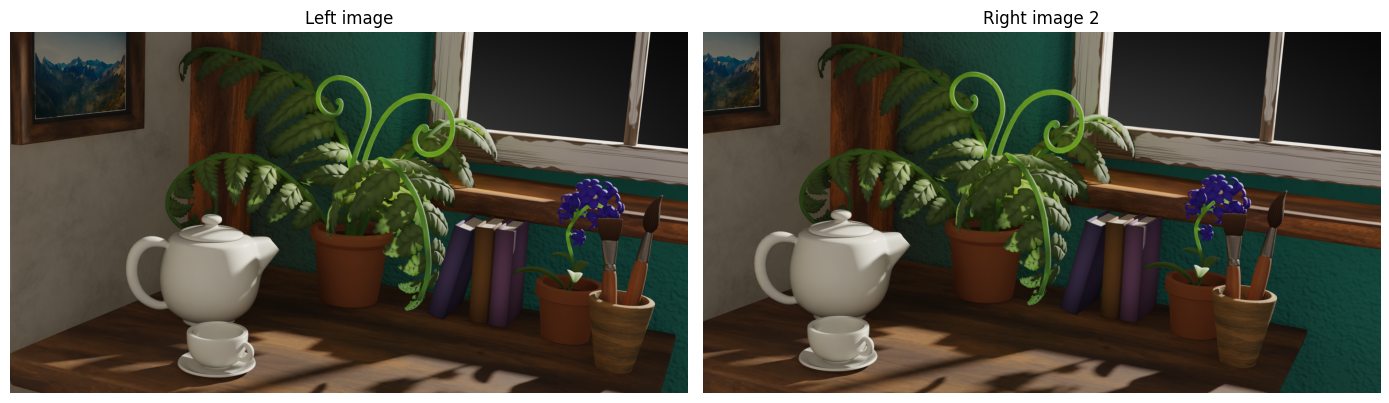

In [84]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(left_image_rgb)
plt.title('Left image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(right_image_rgb)
plt.title('Right image')
plt.axis('off')

plt.tight_layout()

1. Remove red channel from the left image


In [85]:
left_image_gb = left_image_rgb.copy()
left_image_gb[:,:,0] = 0

2. Remove blue and green channel from the right image:


In [86]:
right_image_r = right_image_rgb.copy()
right_image_r[:,:,1] = 0
right_image_r[:,:,2] = 0

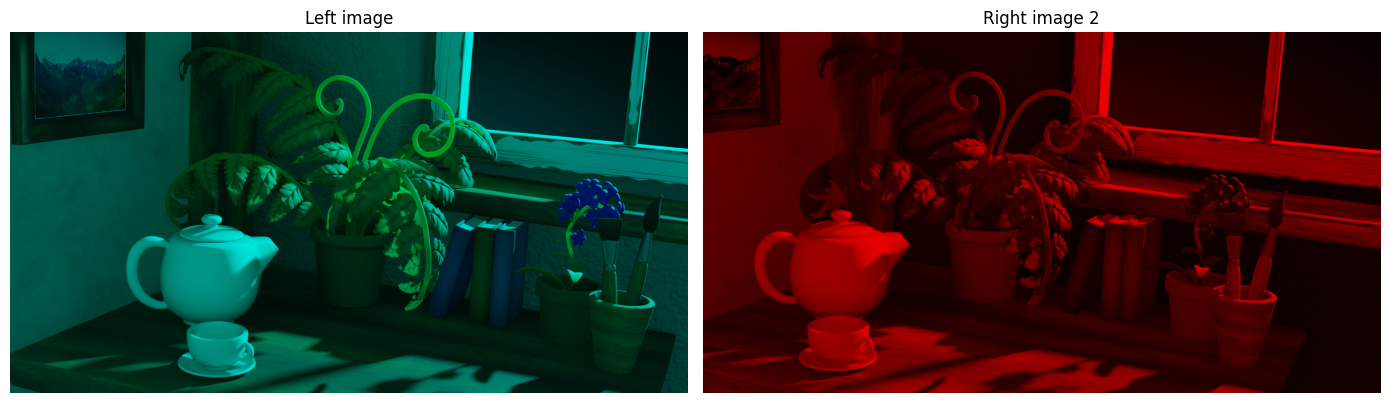

In [87]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(left_image_gb)
plt.title('Left image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(right_image_r)
plt.title('Right image 2')
plt.axis('off')

plt.tight_layout()

3. Combine this tow images and save it


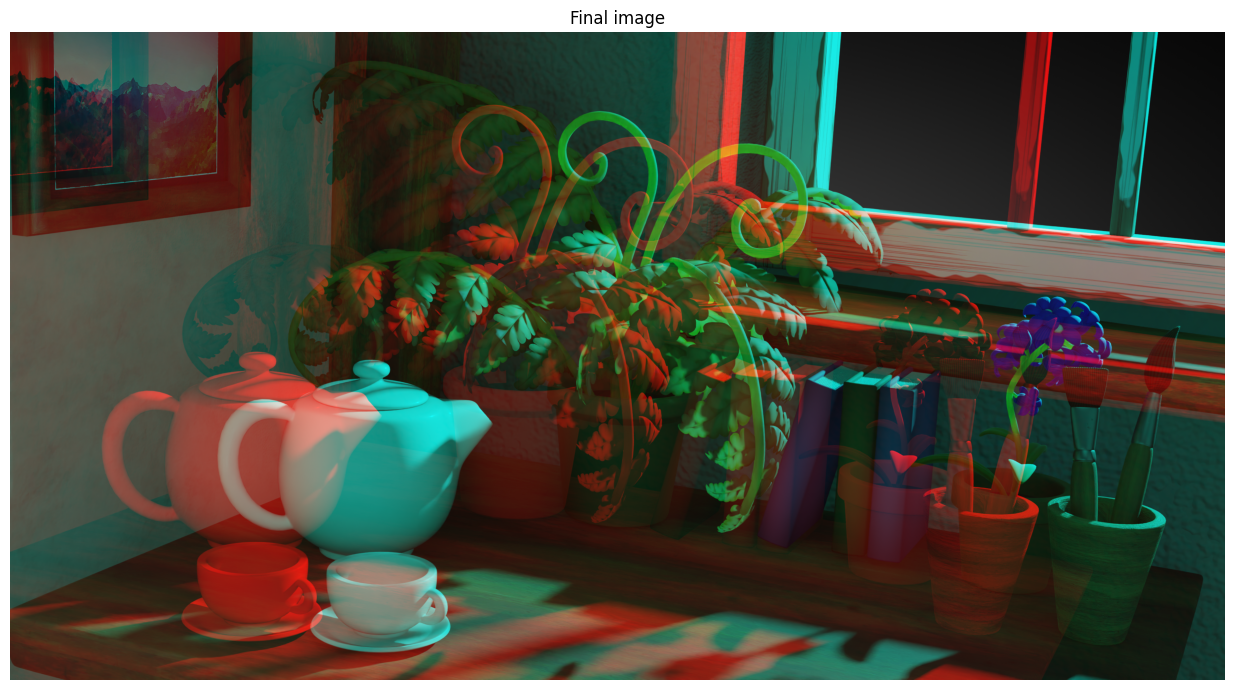

In [96]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 1, 1)
plt.imshow(final_image)
plt.title('Final image')
plt.axis('off')

plt.tight_layout()

## Dynamic shift


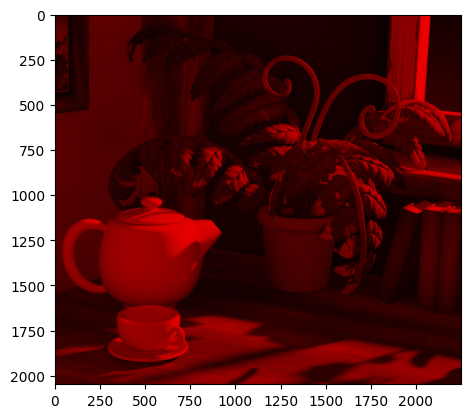

In [90]:
left_boarder = 250
right_boarder = 2500

image_shifted_r = right_image_r[:, left_boarder:right_boarder, :]
plt.imshow(image_shifted_r)

In [91]:
shift = 380

for i in range(1, shift, 1):
    left_shifted_gb = left_image_gb[:, left_boarder+(shift-i):right_boarder+(shift-i), :].copy()
    final_image = left_shifted_gb + image_shifted_r
    cv2.imwrite(f'video/{i}_image.png', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))


### Create Video


In [97]:
import os

image_directory = 'video/'

images = [image for image in os.listdir(image_directory) if image.endswith(('.png', '.jpg', '.jpeg'))]

# Define a custom sorting function to sort by the numerical part of the filenames
def extract_number(filename):
    return int(''.join(filter(str.isdigit, filename)))

images = sorted(images, key=extract_number)

video_name = 'output.mp4'
fps = 30

first_image = cv2.imread(os.path.join(image_directory, images[0]))
height, width, _ = first_image.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

for image in images:
    image_path = os.path.join(image_directory, image)
    frame = cv2.imread(image_path)
    video.write(frame)

video.release()

print(f'Video {video_name} successfully.')

Video output.mp4 successfully.
